In [2]:
!pip install xgboost
!pip install scikit-learn

In [20]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from collections import defaultdict
import pandas as pd

def generate_synthetic_dataset(n_samples, n_features, random_state=42):
  """This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative-dimensional
   hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class. It introduces interdependence between
   these features and adds various types of further noise to the data."""
  X, y = make_classification(n_samples=n_samples, n_features=n_features, random_state=random_state)
  return X, y

def generate_data_splits(X, y):
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
  return X_train, X_test, y_train, y_test

def evaluate_model(model_obj, X_train, X_test, y_train, y_test):
  # Initialize and train the XGBoost classifier
  model_obj.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model_obj.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [30]:
performance_storage = defaultdict(list)

for seed_iteration in range(10):
  print(f"Iteration {seed_iteration}")
  X, y = generate_synthetic_dataset(n_samples=10000, n_features=200, random_state=123+ seed_iteration)

  X_train, X_test, y_train, y_test = generate_data_splits(X, y)

  models_to_evaluate = [
      ('xgb', xgb.XGBClassifier(objective='binary:logistic', random_state=42)),
      ('dt-2', tree.DecisionTreeClassifier(random_state=42, max_depth=2)),
      ('dt-5', tree.DecisionTreeClassifier(random_state=42, max_depth=5)),
      ('dt-10', tree.DecisionTreeClassifier(random_state=42, max_depth=10)),
      ('dt-15', tree.DecisionTreeClassifier(random_state=42, max_depth=15)),
      ('dt-20', tree.DecisionTreeClassifier(random_state=42, max_depth=20))
  ]
  for model in models_to_evaluate:
    print(f"Evaluation of {model[0]}")
    performance_storage[model[0]].append(evaluate_model(model[1], X_train, X_test, y_train, y_test))

final_dataframe = []
for k, v in performance_storage.items():
  for accuracy_iteration_value in v:
    final_dataframe.append([k, accuracy_iteration_value])
final_dataframe = pd.DataFrame(final_dataframe, columns=['Classifier', 'Accuracy'])

Iteration 0
Evaluation of xgb
Evaluation of dt-2
Evaluation of dt-5
Evaluation of dt-10
Evaluation of dt-15
Evaluation of dt-20
Iteration 1
Evaluation of xgb
Evaluation of dt-2
Evaluation of dt-5
Evaluation of dt-10
Evaluation of dt-15
Evaluation of dt-20
Iteration 2
Evaluation of xgb
Evaluation of dt-2
Evaluation of dt-5
Evaluation of dt-10
Evaluation of dt-15
Evaluation of dt-20
Iteration 3
Evaluation of xgb
Evaluation of dt-2
Evaluation of dt-5
Evaluation of dt-10
Evaluation of dt-15
Evaluation of dt-20
Iteration 4
Evaluation of xgb
Evaluation of dt-2
Evaluation of dt-5
Evaluation of dt-10
Evaluation of dt-15
Evaluation of dt-20
Iteration 5
Evaluation of xgb
Evaluation of dt-2
Evaluation of dt-5
Evaluation of dt-10
Evaluation of dt-15
Evaluation of dt-20
Iteration 6
Evaluation of xgb
Evaluation of dt-2
Evaluation of dt-5
Evaluation of dt-10
Evaluation of dt-15
Evaluation of dt-20
Iteration 7
Evaluation of xgb
Evaluation of dt-2
Evaluation of dt-5
Evaluation of dt-10
Evaluation of dt

<ipython-input-35-f79b3f47be53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_dataframe['Classifier'], y=final_dataframe['Accuracy'], palette="coolwarm", capsize=.15, errwidth=0.5)
<ipython-input-35-f79b3f47be53>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.5}` instead.

  sns.barplot(x=final_dataframe['Classifier'], y=final_dataframe['Accuracy'], palette="coolwarm", capsize=.15, errwidth=0.5)


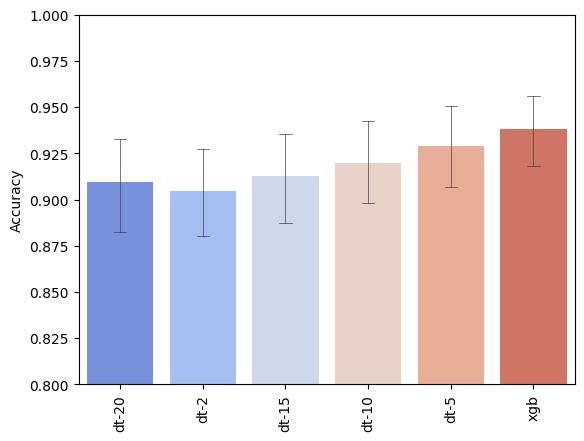

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

final_dataframe = final_dataframe.sort_values(by='Accuracy')
sns.barplot(x=final_dataframe['Classifier'], y=final_dataframe['Accuracy'], palette="coolwarm", capsize=.15, errwidth=0.5)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylim(0.8, 1.0)
plt.show()